In [1]:
import numpy as np
import pandas as pd

In [2]:
lenddata = pd.read_csv('lendingdata.csv')
lenddata.head()

,sex,degree,uni_level,u_loan,guarantee,amount,income,period_m,repayment_m,repayment_T,count,c_borrowing,c_repayment,c_overdue,c_fre,c_over_fre,c_overrate,c_over_frerate,performance
0,male,bachelor,other,travel,Y,0.109063,0.015546,0.505110,-0.238010,0.106394,-0.420401,0.556433,0.551220,-0.370189,0.246736,-0.370365,-0.461185,-0.426766,1
1,male,bachelor,other,study,Y,0.109063,0.624677,0.505110,-0.228049,0.146047,-0.542786,1.762922,1.964899,-0.370189,1.613174,-0.370365,-0.461185,-0.426766,1
2,male,bachelor,high,trading,N,-1.801620,-1.944738,0.505110,-0.818821,-2.216702,-0.787555,-0.879862,-0.774510,-0.370189,-0.677620,-0.370365,-0.461185,-0.426766,1
3,male,NaN,other,study,N,4.738273,2.795424,0.505110,0.910477,4.678341,-0.053247,-0.018085,0.023526,-0.370189,-0.436484,-0.370365,-0.461185,-0.426766,1
4,male,bachelor,other,living,N,1.266366,0.063777,-0.130501,0.210670,1.207284,-0.624375,0.412804,0.472341,-0.370189,0.005599,-0.370365,-0.461185,-0.426766,1


In [3]:
lenddata.degree = lenddata.degree.fillna('bachelor') 

In [4]:
lenddata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1091 entries, 0 to 1090
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sex             1091 non-null   object 
 1   degree          1091 non-null   object 
 2   uni_level       1091 non-null   object 
 3   u_loan          1091 non-null   object 
 4   guarantee       1091 non-null   object 
 5   amount          1091 non-null   float64
 6   income          1091 non-null   float64
 7   period_m        1091 non-null   float64
 8   repayment_m     1091 non-null   float64
 9   repayment_T     1091 non-null   float64
 10  count           1091 non-null   float64
 11  c_borrowing     1091 non-null   float64
 12  c_repayment     1091 non-null   float64
 13  c_overdue       1091 non-null   float64
 14  c_fre           1091 non-null   float64
 15  c_over_fre      1091 non-null   float64
 16  c_overrate      1091 non-null   float64
 17  c_over_frerate  1091 non-null   f

## 分类型变量转换哑变量

In [6]:
lenddata_dummy = pd.get_dummies(lenddata[['sex','degree','uni_level','u_loan','guarantee']],drop_first = True)
lenddata_dummy

,sex_male,degree_college,degree_doctor,degree_master,uni_level_other,u_loan_entertainment,u_loan_living,u_loan_other,u_loan_rent,u_loan_shopping,u_loan_study,u_loan_trading,u_loan_travel,guarantee_Y
0,1,0,0,0,1,0,0,0,0,0,0,0,1,1
1,1,0,0,0,1,0,0,0,0,0,1,0,0,1
2,1,0,0,0,0,0,0,0,0,0,0,1,0,0
3,1,0,0,0,1,0,0,0,0,0,1,0,0,0
4,1,0,0,0,1,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1086,1,0,0,0,1,0,0,0,0,0,0,0,0,1
1087,0,0,0,0,1,0,0,0,0,1,0,0,0,1
1088,0,0,0,0,1,0,0,0,0,1,0,0,0,1
1089,0,0,0,0,1,0,0,0,0,0,0,0,1,1


In [7]:
# 拼表
lenddata = pd.concat([lenddata_dummy,lenddata.iloc[:,5:]],axis=1)
lenddata.head()

,sex_male,degree_college,degree_doctor,degree_master,uni_level_other,u_loan_entertainment,u_loan_living,u_loan_other,u_loan_rent,u_loan_shopping,...,repayment_T,count,c_borrowing,c_repayment,c_overdue,c_fre,c_over_fre,c_overrate,c_over_frerate,performance
0,1,0,0,0,1,0,0,0,0,0,...,0.106394,-0.420401,0.556433,0.551220,-0.370189,0.246736,-0.370365,-0.461185,-0.426766,1
1,1,0,0,0,1,0,0,0,0,0,...,0.146047,-0.542786,1.762922,1.964899,-0.370189,1.613174,-0.370365,-0.461185,-0.426766,1
2,1,0,0,0,0,0,0,0,0,0,...,-2.216702,-0.787555,-0.879862,-0.774510,-0.370189,-0.677620,-0.370365,-0.461185,-0.426766,1
3,1,0,0,0,1,0,0,0,0,0,...,4.678341,-0.053247,-0.018085,0.023526,-0.370189,-0.436484,-0.370365,-0.461185,-0.426766,1
4,1,0,0,0,1,0,1,0,0,0,...,1.207284,-0.624375,0.412804,0.472341,-0.370189,0.005599,-0.370365,-0.461185,-0.426766,1


## 建模

In [8]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,Ytrain,Ytest = train_test_split(lenddata.iloc[:,:-1],lenddata.iloc[:,-1],test_size=0.3,random_state=1234)

In [9]:
from sklearn.linear_model import LogisticRegression

In [10]:
LR = LogisticRegression(C=0.1).fit(Xtrain,Ytrain)   # 偏线性
LR.score(Xtest,Ytest)

0.899390243902439

In [11]:
from sklearn.tree import DecisionTreeClassifier

In [12]:
DTC = DecisionTreeClassifier().fit(Xtrain,Ytrain)   # 偏非线性
DTC.score(Xtest,Ytest)

0.8353658536585366

In [13]:
from sklearn.ensemble import RandomForestClassifier

In [48]:
RF = RandomForestClassifier(n_estimators=100,max_depth=3,class_weight={0:10}).fit(Xtrain,Ytrain)
RF.score(Xtest,Ytest)

0.8628048780487805

In [49]:
from sklearn.metrics import classification_report

In [50]:
print(classification_report(Ytest,RF.predict(Xtest)))

              precision    recall  f1-score   support

           0       0.68      0.84      0.75        82
           1       0.94      0.87      0.90       246

    accuracy                           0.86       328
   macro avg       0.81      0.86      0.83       328
weighted avg       0.88      0.86      0.87       328



## ROC曲线

In [39]:
RF.predict_proba(Xtest)

array([[0.02139893, 0.97860107],
       [0.09981666, 0.90018334],
       [0.20313399, 0.79686601],
       [0.16867786, 0.83132214],
       [0.06849472, 0.93150528],
       [0.94939369, 0.05060631],
       [0.02124816, 0.97875184],
       [0.06245045, 0.93754955],
       [0.89374743, 0.10625257],
       [0.89739689, 0.10260311],
       [0.06266075, 0.93733925],
       [0.14273783, 0.85726217],
       [0.06116966, 0.93883034],
       [0.06078084, 0.93921916],
       [0.07028336, 0.92971664],
       [0.03958571, 0.96041429],
       [0.02319265, 0.97680735],
       [0.22118845, 0.77881155],
       [0.02001609, 0.97998391],
       [0.06301932, 0.93698068],
       [0.06274365, 0.93725635],
       [0.06127121, 0.93872879],
       [0.05225973, 0.94774027],
       [0.96907993, 0.03092007],
       [0.01921643, 0.98078357],
       [0.21048208, 0.78951792],
       [0.02003994, 0.97996006],
       [0.02150347, 0.97849653],
       [0.04977555, 0.95022445],
       [0.06877699, 0.93122301],
       [0.

0.9477989292088043


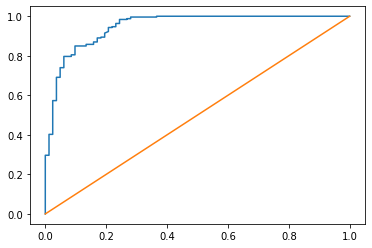

In [41]:
from sklearn import metrics
import matplotlib.pyplot as plt
fpr,tpr,threshold = metrics.roc_curve(Ytest,RF.predict_proba(Xtest)[:,1])
roc_auc = metrics.auc(fpr,tpr)
print(roc_auc)
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1])